# The Iris Dataset
This is a very popular dataset used for teaching classification problems. This is one of the toy datasets provided with scikit-learn. In this notebooks we learn how to explore basic classification features.

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [7]:
X = iris.data
y = iris.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [9]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [10]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [11]:
clf.score(X_test, y_test)

0.9565217391304348

So we got an accuracy of 97.78% ! Not bad for using a simple desicion tree without any fine tuning. Now we will try to visualize he decision process using  pydot and graphviz.

In [12]:
import graphviz 

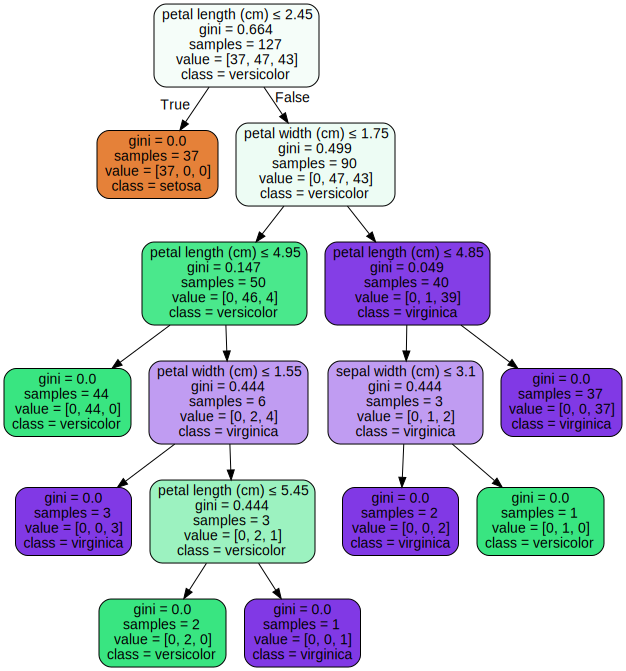

In [13]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True, impurity=False)
graph = graphviz.Source(dot_data) 
graph